<a href="https://colab.research.google.com/github/aarish7771/Deep_Learning/blob/main/Hybrid_Deep_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mega Case Study

### Part-1 SOM

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Importing the Dataset

In [2]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

#### Training the SOM

In [4]:
from minisom import MiniSom

In [5]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

#### Visualizing the results

In [6]:
from pylab import bone, pcolor, colorbar, plot, show

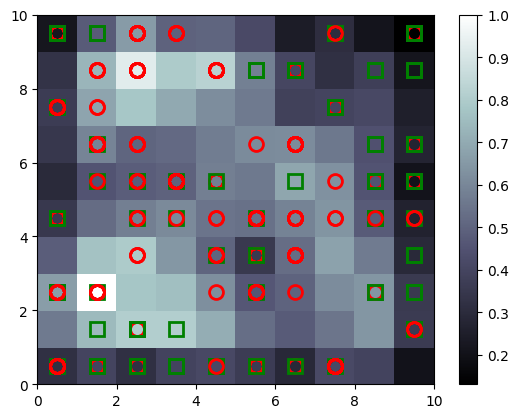

In [7]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

#### Finding the frauds

In [8]:
mappings = som.win_map(X)
fraud_coords = [(1,2),(2,8)]  # Coordinates you believe contain frauds
frauds = []

for coord in fraud_coords:
    if coord in mappings:
        frauds.append(mappings[coord])

frauds = np.concatenate(frauds, axis=0) if frauds else np.array([])

if len(frauds) > 0:
    frauds = sc.inverse_transform(frauds)
    fraud_ids = []
    for i in range(len(frauds)):
        fraud_ids.append(int(frauds[i, 0]))  # Assuming the first column is the Customer ID

    print("Fraud Customer IDs:")
    for fid in fraud_ids:
        print(fid)
else:
    print("No frauds found at the specified coordinates.")

Fraud Customer IDs:
15575605
15646594
15577771
15593834
15599272
15711299
15609987
15666096
15611682
15618258
15706762
15672894
15763579
15793825
15696361
15782159
15717700
15750104
15609758
15749964
15805261


## 2) Going from unsupervised to supervised deep learning

#### Creating the matrix of features

In [9]:
customers = dataset.iloc[:,1:].values

#### Creating the dependent variable

In [11]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

### Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Part 2 - Building the ANN

In [14]:
import tensorflow as tf

### Initializing the ANN

In [15]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [16]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

### Adding the output layer

In [17]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [18]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [19]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Epoch 1/2
690/690 [==============================] - 2s 2ms/step - loss: 0.8004 - accuracy: 0.6043
Epoch 2/2
690/690 [==============================] - 2s 3ms/step - loss: 0.4386 - accuracy: 0.9333


#### Predicting the probabilities of fruads

In [22]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:,0:1].values, y_pred), axis=1)
y_pred = y_pred[y_pred[:,1].argsort()]
df = pd.DataFrame(y_pred, columns=['Customer ID', 'Fraud Probability'])
print(df)

22/22 [==============================] - 0s 2ms/step
     Customer ID  Fraud Probability
0     15592412.0           0.262363
1     15795690.0           0.262363
2     15567860.0           0.262363
3     15735572.0           0.262363
4     15605341.0           0.262363
..           ...                ...
685   15654625.0           0.459900
686   15762716.0           0.461186
687   15651460.0           0.476385
688   15598802.0           0.587529
689   15790113.0           0.795563

[690 rows x 2 columns]
